In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [15]:
# Lê o arquivo
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Mostra as primeiras 5 linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

# Mostra informações sobre as colunas
print("\nInformações sobre o dataset:")
print(df.info())

# Mostra os nomes das colunas
print("\nNomes das colunas:")
print(df.columns.tolist())

Primeiras 5 linhas do dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHo

In [16]:
# Verificar valores nulos
def check_and_handle_nulls(df):
    # Mostrar quantidade de valores nulos por coluna
    print("\nValores nulos por coluna:")
    print(df.isnull().sum())

    # Porcentagem de valores nulos
    print("\nPorcentagem de valores nulos por coluna:")
    print((df.isnull().sum() / len(df)) * 100)

    # Tratar valores nulos
    # 1. Para variáveis numéricas: preencher com a média
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mean())

    # 2. Para variáveis categóricas: preencher com a moda
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

    return df

# Modificar a função load_and_preprocess_data
def load_and_preprocess_data(filename):
    # Carregar dados
    df = pd.read_csv(filename)

    # Verificar e tratar valores nulos
    print("Verificando valores nulos...")
    df = check_and_handle_nulls(df)

    # Converter variáveis categóricas
    le = LabelEncoder()
    df['Attrition'] = le.fit_transform(df['Attrition'])
    df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
    df['Department'] = le.fit_transform(df['Department'])

    # Selecionar features relevantes
    features = ['Age', 'DailyRate', 'BusinessTravel', 'Department']
    X = df[features].values
    y = df['Attrition'].values

    # Normalizar features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler

In [17]:
import pandas as pd
import numpy as np

# Carregar o dataset
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Análise detalhada dos dados
print("Informações do Dataset:")
print(df.info())

print("\nVerificando valores nulos:")
print(df.isnull().sum())

print("\nPorcentagem de valores nulos:")
print((df.isnull().sum() / len(df)) * 100)

# Estatísticas básicas
print("\nEstatísticas descritivas:")
print(df.describe())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  

In [18]:
def load_and_preprocess_data(filename):
    # Carregar dados
    df = pd.read_csv(filename)

    # Converter variáveis categóricas
    categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                         'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

    le = LabelEncoder()
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])

    # Selecionar features mais relevantes para predição de Attrition
    features = [
        'Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'RelationshipSatisfaction', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'OverTime'
    ]

    X = df[features].values
    y = df['Attrition'].values

    # Normalizar features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler

# Atualizar a arquitetura do modelo para lidar com mais features
def build_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Adicionar Early Stopping para evitar overfitting
from tensorflow.keras.callbacks import EarlyStopping

def train_and_evaluate():
    # Carregar e preparar dados
    X, y, scaler = load_and_preprocess_data('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
    X_lstm, y = prepare_data_for_lstm(X, y)

    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

    # Construir modelo
    model = build_model((X_train.shape[1], X_train.shape[2]))

    # Configurar Early Stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    # Treinar modelo
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Avaliar modelo
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'\nAcurácia do teste: {accuracy*100:.2f}%')

    return model, history, scaler

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7293 - loss: 0.6750 - val_accuracy: 0.7966 - val_loss: 0.6146
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8446 - loss: 0.5638 - val_accuracy: 0.7966 - val_loss: 0.5099
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8415 - loss: 0.4464 - val_accuracy: 0.7966 - val_loss: 0.5178
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8464 - loss: 0.4284 - val_accuracy: 0.7966 - val_loss: 0.5112
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.4373 - val_accuracy: 0.7966 - val_loss: 0.5107
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8370 - loss: 0.4444 - val_accuracy: 0.7966 - val_loss: 0.5089
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8500 - loss: 0.4257 - val_accuracy: 0.7966 - val_loss: 0.5093
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8469 - loss: 0.4237 - val_accuracy: 0.7966 - val_loss: 0.

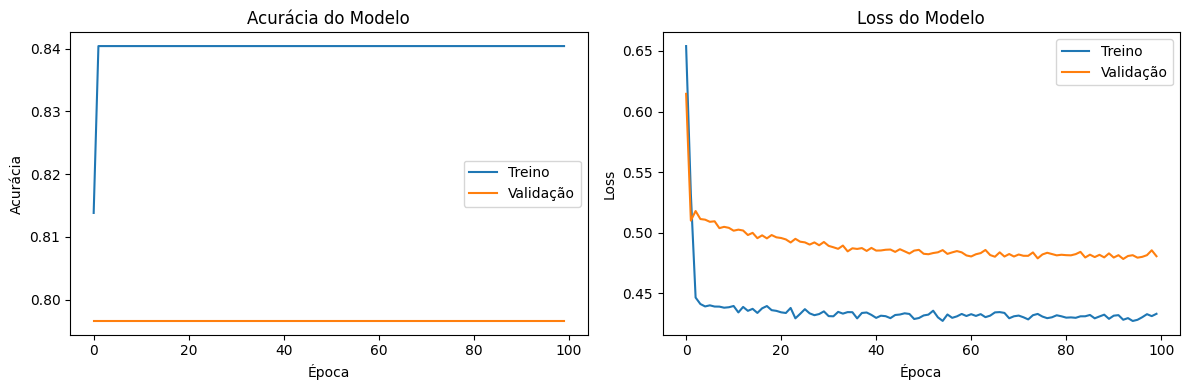

In [19]:
# 1. Carregamento e Pré-processamento dos Dados
def load_and_preprocess_data(filename):
    # Carregar dados
    df = pd.read_csv(filename)

    # Converter variáveis categóricas
    le = LabelEncoder()
    df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes/No para 1/0
    df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
    df['Department'] = le.fit_transform(df['Department'])

    # Selecionar features relevantes
    features = ['Age', 'DailyRate', 'BusinessTravel', 'Department']
    X = df[features].values
    y = df['Attrition'].values

    # Normalizar features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler

# 2. Preparar dados para LSTM
def prepare_data_for_lstm(X, y):
    # Reshape data para formato 3D requerido pelo LSTM: [samples, timesteps, features]
    X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
    return X_reshaped, y

# 3. Construir Modelo LSTM
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Sigmoid para classificação binária
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',  # Para classificação binária
                 metrics=['accuracy'])
    return model

# 4. Treinar e Avaliar
def train_and_evaluate():
    # Carregar e preparar dados
    X, y, scaler = load_and_preprocess_data('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
    X_lstm, y = prepare_data_for_lstm(X, y)

    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

    # Construir e treinar modelo
    model = build_model((X_train.shape[1], X_train.shape[2]))

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Avaliar modelo
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'\nAcurácia do teste: {accuracy*100:.2f}%')

    return model, history, scaler

# 5. Visualizar Resultados
def plot_training_history(history):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treino')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title('Acurácia do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Executar o treinamento
if __name__ == "__main__":
    model, history, scaler = train_and_evaluate()
    plot_training_history(history)